In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !cp -r /content/drive/MyDrive/AssignmentWorks/Garbage ./

In [ ]:
# !mv  ./processed_images /content/Garbage/
# !rm -rf /content/saved_model.h5 /content/model.h5 /content/model.tflite

In [ ]:
import tensorflow as tf
#import tensorflow.contrib.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from PIL import Image
from pathlib import Path
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

print("Done with library declaration, Current version of Tensorflow is: ", tf.__version__)

Done with library declaration, Current version of Tensorflow is:  2.15.0


In [ ]:
# collect directory
data_dir = Path('Garbage/original_images')

transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformer)

# display class names
print(dataset.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


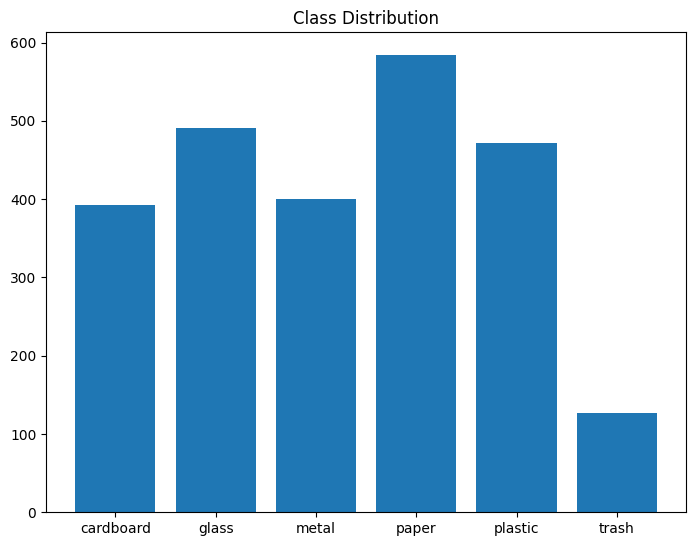

In [ ]:
# display class distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counts = [393,491,400,584,472,127]
ax.bar(dataset.classes,counts)
plt.title('Class Distribution')
plt.show()

In [ ]:
PATH_TEST = r"Garbage/original_images"
PATH_TRAIN = r"Garbage/processed_images"
class_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']

In [ ]:
import os
from PIL import Image

In [ ]:
imagepath_cardboard = r"Garbage/original_images/cardboard"
graypath_cardboard = r"Garbage/processed_images/cardboard"
File_listing = os.listdir(imagepath_cardboard)
for file in File_listing:
    im = Image.open(imagepath_cardboard + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_cardboard + '/' + file, "JPEG")

In [ ]:
imagepath_glass = r"Garbage/original_images/glass"
graypath_glass = r"Garbage/processed_images/glass"
File_listing = os.listdir(imagepath_glass)
for file in File_listing:
    im = Image.open(imagepath_glass + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_glass + '/' + file, "JPEG")

In [ ]:
imagepath_metal = r"Garbage/original_images/metal"
graypath_metal = r"Garbage/processed_images/metal"
File_listing = os.listdir(imagepath_metal)
for file in File_listing:
    im = Image.open(imagepath_metal + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_metal + '/' + file, "JPEG")

In [ ]:
imagepath_paper = r"Garbage/original_images/paper"
graypath_paper = r"Garbage/processed_images/paper"
File_listing = os.listdir(imagepath_paper)
for file in File_listing:
    im = Image.open(imagepath_paper + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_paper + '/' + file, "JPEG")

In [ ]:
imagepath_plastic = r"Garbage/original_images/plastic"
graypath_plastic = r"Garbage/processed_images/plastic"
File_listing = os.listdir(imagepath_plastic)
for file in File_listing:
    im = Image.open(imagepath_plastic + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_plastic + '/' + file, "JPEG")

In [ ]:
imagepath_trash = r"Garbage/original_images/trash"
graypath_trash = r"Garbage/processed_images/trash"
File_listing = os.listdir(imagepath_trash)
for file in File_listing:
    im = Image.open(imagepath_trash + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_trash + '/' + file, "JPEG")

In [ ]:
train_dir = os.path.join(PATH_TRAIN)
test_dir = os.path.join(PATH_TEST)

In [ ]:
imagepath_cardboard_dir = os.path.join(imagepath_cardboard)
imagepath_glass_dir = os.path.join(imagepath_glass)
imagepath_metal_dir = os.path.join(imagepath_metal)
imagepath_paper_dir = os.path.join(imagepath_paper)
imagepath_plastic_dir = os.path.join(imagepath_plastic)
imagepath_trash_dir = os.path.join(imagepath_trash)

In [ ]:
len(os.listdir(PATH_TRAIN))

6

In [ ]:
IMG_HEIGHT = 32
IMG_WIDTH = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = image_gen.flow_from_directory(
    directory = train_dir,
    shuffle=True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2555 images belonging to 6 classes.


In [ ]:
test_data_gen = image_gen.flow_from_directory(
    directory = test_dir,
    shuffle=True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2535 images belonging to 6 classes.


In [ ]:
#plt.figure()
#plt.imshow(sample_training_images[0])
#plt.show()
sample_data_gen = image_gen.flow_from_directory(
    directory = test_dir,
    shuffle=True,
    target_size = (200, 200),
    class_mode='categorical')

sample_training_images, _= next(sample_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1,4, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Found 2535 images belonging to 6 classes.


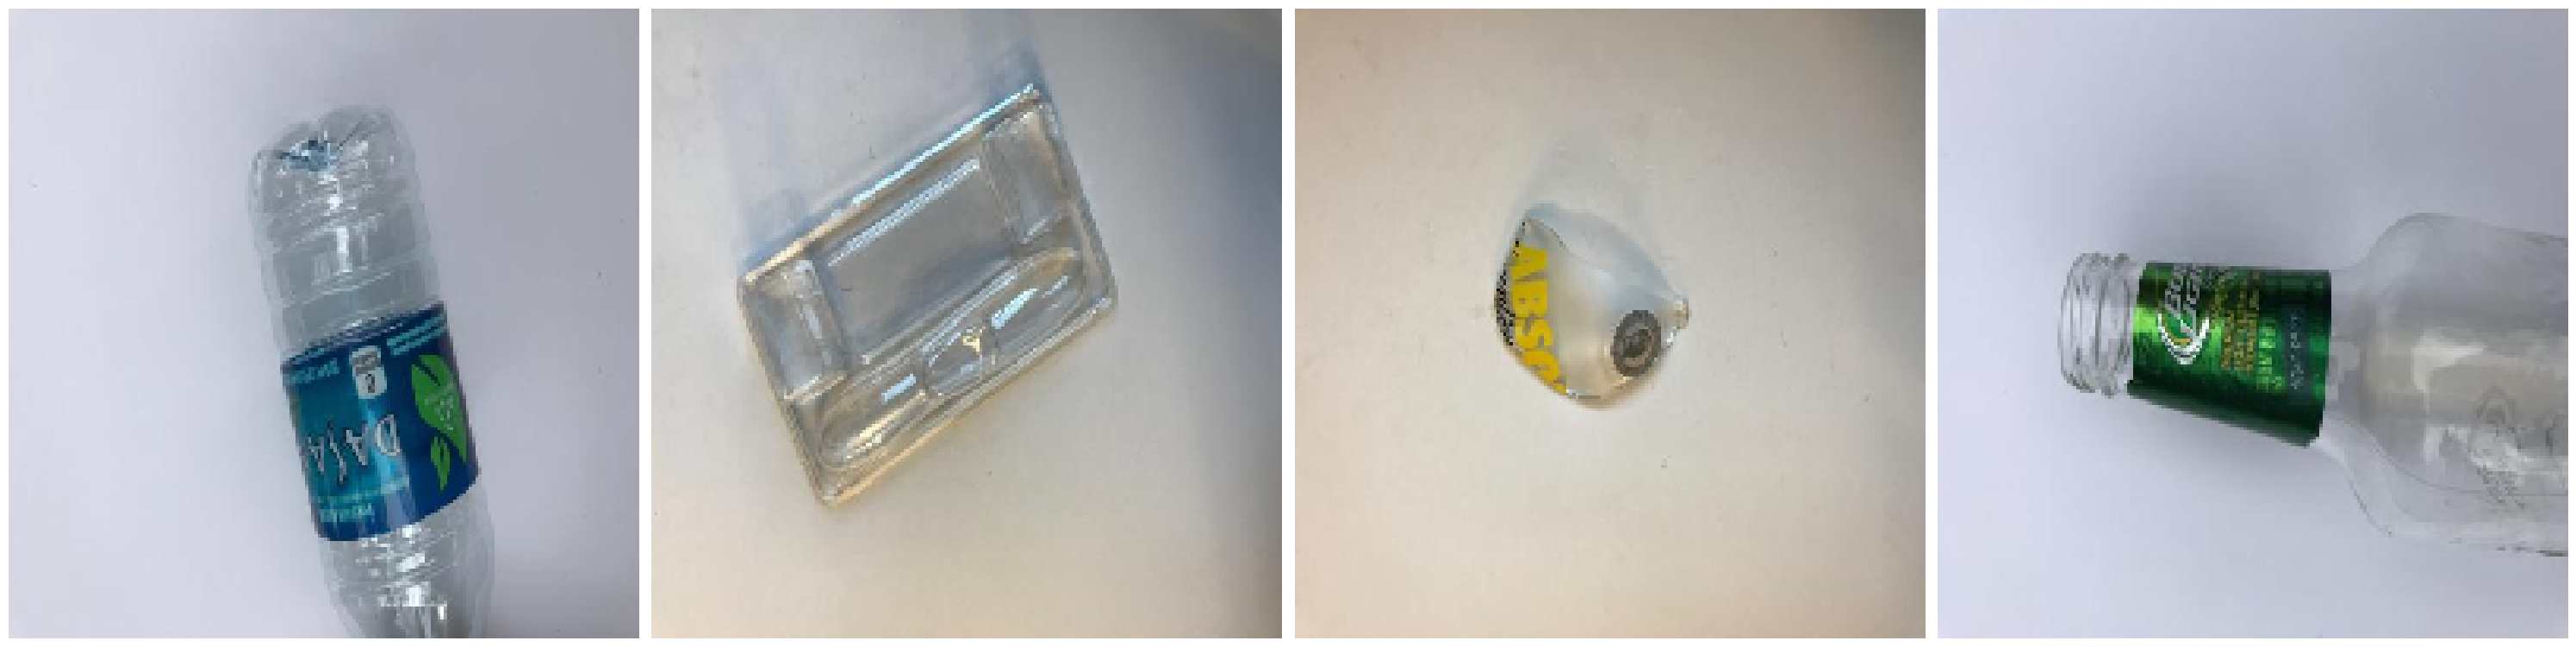

In [ ]:
import matplotlib.pyplot as plt

plotImages(sample_training_images[:4])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(6, activation='softmax')
])

In [ ]:
batch_size = 45
epochs = 60
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 32)         

In [ ]:
num_cardboard_train = len(os.listdir(imagepath_cardboard_dir))
num_glass_train = len(os.listdir(imagepath_glass_dir))
num_metal_train = len(os.listdir(imagepath_metal_dir))
num_paper_train = len(os.listdir(imagepath_cardboard_dir))
num_plastic_train = len(os.listdir(imagepath_glass_dir))
num_trash_train = len(os.listdir(imagepath_trash_dir))

num_cardboard_test = len(os.listdir(graypath_cardboard))
num_glass_test = len(os.listdir(graypath_glass))
num_metal_test = len(os.listdir(graypath_metal))
num_paper_test = len(os.listdir(graypath_paper))
num_plastic_test = len(os.listdir(graypath_plastic))
num_trash_test = len(os.listdir(graypath_trash))

total_train = num_cardboard_train + num_glass_train + num_metal_train + num_paper_train + num_plastic_train + num_trash_train
total_test = num_cardboard_test + num_glass_test + num_metal_test + num_paper_test + num_plastic_test + num_trash_test

In [ ]:
history = model.fit(
    train_data_gen,
    validation_data = train_data_gen,
    steps_per_epoch= total_train // batch_size,
    epochs = epochs,
    validation_steps= total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.01,
                patience=7)]
)


Epoch 1/60
52/52 [==============================] - 8s 131ms/step - loss: 1.7370 - accuracy: 0.2194 - val_loss: 1.7217 - val_accuracy: 0.2193
Epoch 2/60
52/52 [==============================] - 4s 85ms/step - loss: 1.7179 - accuracy: 0.2344 - val_loss: 1.7025 - val_accuracy: 0.2444
Epoch 3/60
52/52 [==============================] - 6s 111ms/step - loss: 1.6473 - accuracy: 0.2634 - val_loss: 1.5741 - val_accuracy: 0.3259
Epoch 4/60
52/52 [==============================] - 6s 115ms/step - loss: 1.5973 - accuracy: 0.3275 - val_loss: 1.5714 - val_accuracy: 0.3220
Epoch 5/60
52/52 [==============================] - 5s 100ms/step - loss: 1.5085 - accuracy: 0.3593 - val_loss: 1.4623 - val_accuracy: 0.4035
Epoch 6/60
52/52 [==============================] - 6s 109ms/step - loss: 1.4396 - accuracy: 0.4225 - val_loss: 1.3989 - val_accuracy: 0.4554
Epoch 7/60
52/52 [==============================] - 4s 86ms/step - loss: 1.3773 - accuracy: 0.4575 - val_loss: 1.3799 - val_accuracy: 0.4688
Epoch 8/

In [ ]:
test_loss, test_acc = model.evaluate(test_data_gen)
print('Test accuracy: {} Test Loss: {} '.format(test_acc*100, test_loss))

80/80 [==============================] - 5s 56ms/step - loss: 0.6231 - accuracy: 0.8059
Test accuracy: 80.59171438217163 Test Loss: 0.6230966448783875 


In [ ]:
# ## save model
# model.save('./model.h5')
# model.export('./saved_model.h5')

### Converting model to tflite

In [ ]:
# convert model to tflite
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

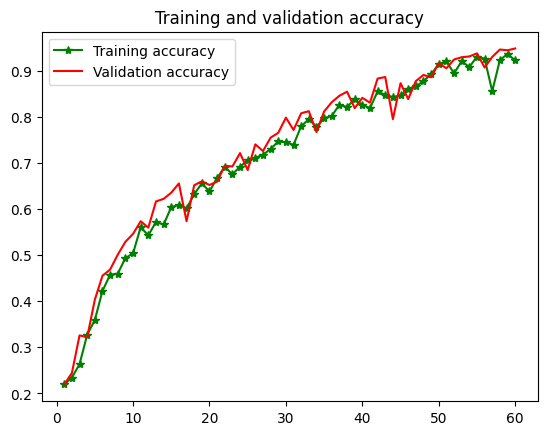

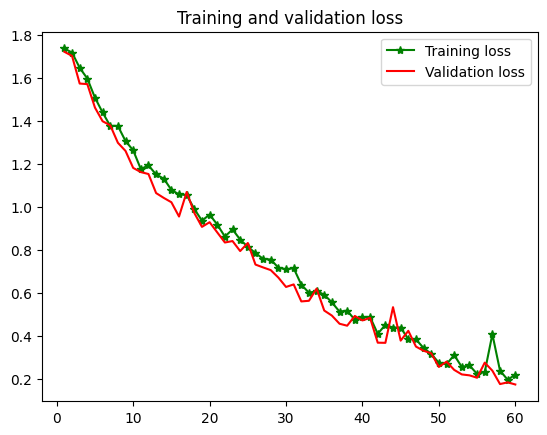

In [ ]:
train_acc = history.history['accuracy'] # store training accuracy in history
val_acc = history.history['val_accuracy'] # store validation accuracy in history
train_loss = history.history['loss'] # store training loss in history
val_loss = history.history['val_loss'] # store validation loss in history

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'g*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'g*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# CNN

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  # Import to_categorical from tensorflow.keras.utils
from sklearn.metrics import confusion_matrix

80/80 [==============================] - 9s 107ms/step


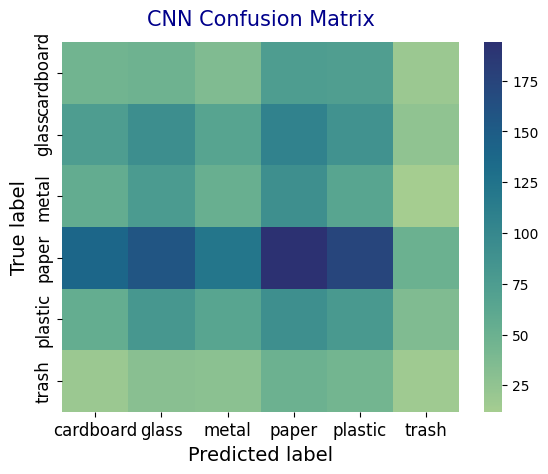

Classification Report


In [ ]:
(X,y) = (train_data_gen[0], train_data_gen[1])
y_test = train_test_split(X,y,test_size=0.2, random_state=4)

nb_classes = 6
Y_train = model.predict(train_data_gen)
y_train = np.argmax(Y_train, axis=1)
Y_test = model.predict(test_data_gen)
y_test = np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test[:2534], y_train[:2534])


#visualize confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test[:2534], y_train[:2534])), ('cardboard', 'glass', 'metal','paper','plastic','trash'),
                      ('cardboard', 'glass', 'metal','paper','plastic','trash'))

heatmap = sns.heatmap(matrix, annot = False, annot_kws = {'size': 14}, fmt = 'd', cmap = 'crest')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)
plt.title('CNN Confusion Matrix', fontsize = 15, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

print('Classification Report')
target_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']
# print(classification_report(train_data_gen.classes, y_test[:2534], target_names=target_names,zero_division=0))

In [ ]:
# to identify the accuracy of each class
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Overall accuracy
print ("Cardboard Glass Metal Paper Plastic Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)

Cardboard Glass Metal Paper Plastic Trash
[0.765588   0.70165746 0.75611681 0.58445146 0.6949487  0.87608524]


# Display random waste (Prediction)

In [ ]:
from skimage.transform import resize

In [ ]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np
number_to_class = ['cardboard',\
                   'glass',\
                   'metal',
                   'paper',\
                   'plastic',\
                   'trash',]

In [ ]:
test_x, test_y = train_data_gen.__getitem__(1)
plt.imshow(test_x[2
                  ])

1/1 [==============================] - 0s 38ms/step


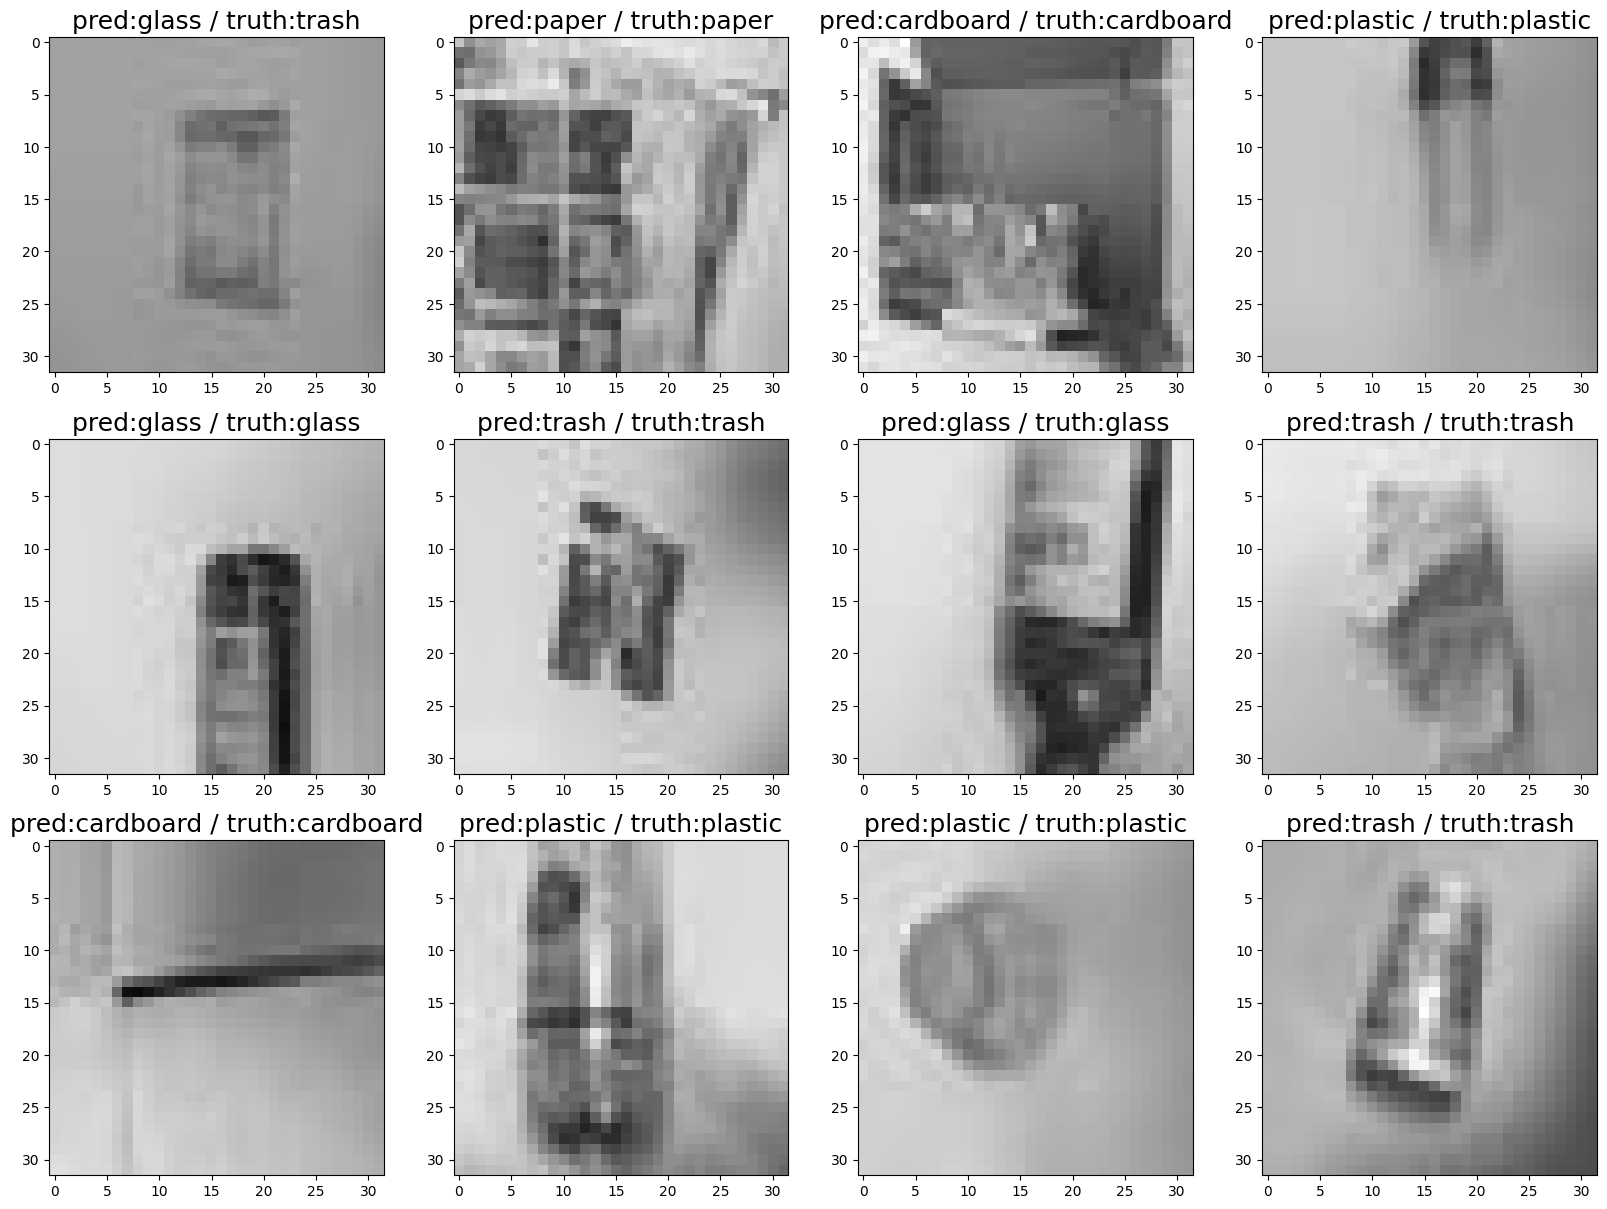

In [ ]:
test_x, test_y = train_data_gen.__getitem__(1)
# test_x is used to train the data
# test_y refers to the actual answer of the testing set data
# preds refers to the predicted class
preds = model.predict(test_x)


plt.figure(figsize=(20, 20))
for i in range(12):
    plt.subplot(4,4, i+1)
    plt.title('pred:%s / truth:%s' % (number_to_class[np.argmax(preds[i])], number_to_class[np.argmax(test_y[i])]), size=18)
    plt.imshow(test_x[i])
#shows some testing results

# CLASS - Cardboard

1/1 [==============================] - 0s 35ms/step
Probability: 0.8903261
Classified: plastic 
 cardboard


Text(0.5, 1.0, 'Loaded Image')

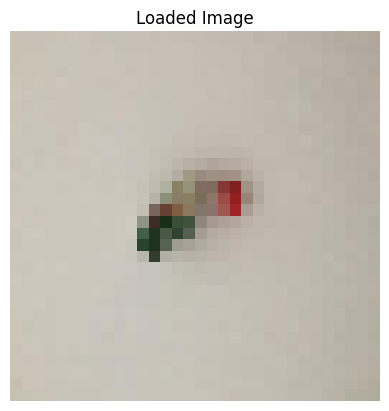

In [ ]:
# test_img = 'Garbage/processed_images/cardboard/cardboard_321.jpg'
test_img = '/content/Garbage/original_images/plastic/plastic_003.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n' , number_to_class[np.argmax(test_img[0])])

plt.axis('off')
plt.imshow(img.squeeze())
plt.imshow(img)
plt.title("Loaded Image")

# CLASS - Glass

In [ ]:
test_img = 'Garbage/processed_images/glass/glass_341.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

# CLASS - Metal

In [ ]:
test_img = 'Garbage/processed_images/metal/metal_100.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

# CLASS - Paper

In [ ]:
test_img = 'Garbage/processed_images/paper/paper_324.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

# CLASS - Plastic

In [ ]:
test_img = 'Garbage/processed_images/plastic/plastic_155.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

# CLASS - Trash

In [ ]:
test_img = 'Garbage/processed_images/trash/trash_032.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")